In [47]:
import tensorflow as tf

import os
import pathlib
import time
import datetime

from matplotlib import pyplot as plt
from IPython import display

In [2]:
gpus = tf.config.experimental.list_physical_devices('GPU')
for gpu in gpus:
    print("Name:", gpu.name, "  Type:", gpu.device_type)

Name: /physical_device:GPU:0   Type: GPU


In [3]:
from tensorflow.python.client import device_lib

device_lib.list_local_devices()

[name: "/device:CPU:0"
 device_type: "CPU"
 memory_limit: 268435456
 locality {
 }
 incarnation: 13303797240975667486
 xla_global_id: -1,
 name: "/device:GPU:0"
 device_type: "GPU"
 memory_limit: 48124395520
 locality {
   bus_id: 1
   links {
   }
 }
 incarnation: 13814587801404056441
 physical_device_desc: "device: 0, name: NVIDIA RTX A6000, pci bus id: 0000:65:00.0, compute capability: 8.6"
 xla_global_id: 416903419]

In [4]:
tf.test.is_gpu_available()

Instructions for updating:
Use `tf.config.list_physical_devices('GPU')` instead.


True

In [48]:
from sklearn.model_selection import train_test_split
import os
import shutil
import cv2
import numpy as np

In [6]:

"""
# Load the two images
image1 = cv2.imread("/kaggle/working/train/colors/00010218.png")
image2 = cv2.imread("/kaggle/working/train/footprints/00010218.png")

# Ensure both images are of the same size
if image1.shape != image2.shape:
    image2 = cv2.resize(image2, (image1.shape[1], image1.shape[0]))  # Resize image2 to match image1's size

# Concatenate the images horizontally
concatenated_image = np.concatenate((image1, image2), axis=1)


# To save the concatenated image
cv2.imwrite("/kaggle/working/try.png", concatenated_image)

#/kaggle/working/train/colors/00010218.png
"""

'\n# Load the two images\nimage1 = cv2.imread("/kaggle/working/train/colors/00010218.png")\nimage2 = cv2.imread("/kaggle/working/train/footprints/00010218.png")\n\n# Ensure both images are of the same size\nif image1.shape != image2.shape:\n    image2 = cv2.resize(image2, (image1.shape[1], image1.shape[0]))  # Resize image2 to match image1\'s size\n\n# Concatenate the images horizontally\nconcatenated_image = np.concatenate((image1, image2), axis=1)\n\n\n# To save the concatenated image\ncv2.imwrite("/kaggle/working/try.png", concatenated_image)\n\n#/kaggle/working/train/colors/00010218.png\n'

In [7]:

# Define paths to the two folders containing images
folder1_path = r"C:\Users\ayush-s\research floor\SmartPlanAI-main\Dataset\Database\colors"
folder2_path = r"C:\Users\ayush-s\research floor\SmartPlanAI-main\Dataset\Database\footprints"
output_folder_path = r"C:\Users\ayush-s\research floor\SmartPlanAI-main\main"

# Ensure the output folder exists
os.makedirs(output_folder_path, exist_ok=True)

# Iterate over the images in folder1 and concatenate with corresponding images in folder2
for filename in os.listdir(folder1_path):
    if os.path.isfile(os.path.join(folder1_path, filename)):
        img1 = cv2.imread(os.path.join(folder1_path, filename))
        img2 = cv2.imread(os.path.join(folder2_path, filename))

        # Ensure both images are of the same size
        if img1.shape != img2.shape:
            img2 = cv2.resize(img2, (img1.shape[1], img1.shape[0]))

        # Concatenate the images horizontally
        concatenated_img = np.concatenate((img1, img2), axis=1)

        # Save the concatenated image to the output folder
        cv2.imwrite(os.path.join(output_folder_path, filename), concatenated_img)

print("Concatenation completed.")


Concatenation completed.


For deleting unecessary folders

In [ ]:
"""
import shutil

def delete_directory(directory):
    shutil.rmtree(directory)
    print(f"Deleted directory: {directory}")

# Specify the directory you want to delete
directory_to_delete = "/kaggle/working/footprints"

# Call the function to delete the specified directory
delete_directory(directory_to_delete)
"""

'\nimport shutil\n\ndef delete_directory(directory):\n    shutil.rmtree(directory)\n    print(f"Deleted directory: {directory}")\n\n# Specify the directory you want to delete\ndirectory_to_delete = "/kaggle/working/footprints"\n\n# Call the function to delete the specified directory\ndelete_directory(directory_to_delete)\n'

In [8]:
import os
import cv2
import numpy as np
from sklearn.model_selection import train_test_split

# Define paths to the concatenated images folder and output directories for train, test, and validation sets
concatenated_folder_path = r"C:\Users\ayush-s\research floor\SmartPlanAI-main\main"
train_path = r"C:\Users\ayush-s\research floor\SmartPlanAI-main\work\train"
test_path = r"C:\Users\ayush-s\research floor\SmartPlanAI-main\work\test"
val_path = r"C:\Users\ayush-s\research floor\SmartPlanAI-main\work\val"

# Ensure the output directories exist
os.makedirs(train_path, exist_ok=True)
os.makedirs(test_path, exist_ok=True)
os.makedirs(val_path, exist_ok=True)

# Load the list of concatenated image filenames
concatenated_images = os.listdir(concatenated_folder_path)

# Split the concatenated images into train, test, and validation sets
train_images, test_val_images = train_test_split(concatenated_images, test_size=0.2, random_state=42)
test_images, val_images = train_test_split(test_val_images, test_size=0.5, random_state=42)

# Move images to respective directories
def move_images(images, src_folder, dst_folder):
    for img_filename in images:
        src = os.path.join(src_folder, img_filename)
        dst = os.path.join(dst_folder, img_filename)
        shutil.move(src, dst)

move_images(train_images, concatenated_folder_path, train_path)
move_images(test_images, concatenated_folder_path, test_path)
move_images(val_images, concatenated_folder_path, val_path)

print("Splitting completed.")


Splitting completed.


Checking data

In [ ]:
"""
sample_image1 = tf.io.read_file('/kaggle/working/val/00004140.png')
sample_image1 = tf.io.decode_png(sample_image1)
print(sample_image1.shape)
"""

"\nsample_image1 = tf.io.read_file('/kaggle/working/val/00004140.png')\nsample_image1 = tf.io.decode_png(sample_image1)\nprint(sample_image1.shape)\n"

In [ ]:
"""
plt.figure()

plt.imshow(sample_image1)
"""

'\nplt.figure()\n\nplt.imshow(sample_image1)\n'

In [49]:

PATH = pathlib.Path(r'C:\Users\ayush-s\research floor\SmartPlanAI-main\work')

In [50]:
def load(image_file):
  # Read and decode an image file to a uint8 tensor
  image = tf.io.read_file(image_file)
  image = tf.io.decode_jpeg(image)

  # Split each image tensor into two tensors:
  # - one with a real building facade image
  # - one with an architecture label image 
  w = tf.shape(image)[1]
  w = w // 2
  input_image = image[:, w:, :]
  real_image = image[:, :w, :]

  # Convert both images to float32 tensors
  input_image = tf.cast(input_image, tf.float32)
  real_image = tf.cast(real_image, tf.float32)

  return input_image, real_image

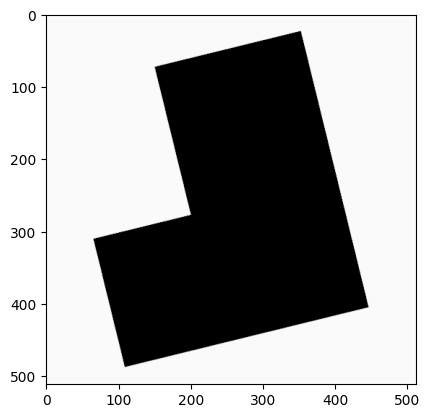

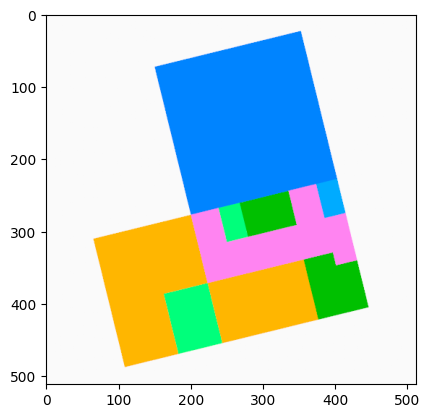

In [51]:
img_f, img_c = load(str(PATH / 'train/00000001.png'))
# Casting to int for matplotlib to display the images
plt.figure()
plt.imshow(img_f / 255.0)
plt.figure()
plt.imshow(img_c / 255.0)

In [52]:
"""
img_c = tf.io.read_file('/kaggle/working/test/colors/00005917.png')
image_c = tf.io.decode_png(img_c)
color_image = tf.cast(image_c, tf.float32)

img_f = tf.io.read_file('/kaggle/working/test/footprints/00005917.png')
image_f = tf.io.decode_png(img_f)
footprints_image = tf.cast(image_f, tf.float32)

img_w = tf.io.read_file('/kaggle/working/test/walls/00005917.png')
image_w = tf.io.decode_png(img_w)
walls_image = tf.cast(image_w, tf.float32)
# Casting to int for matplotlib to display the images
plt.figure()
plt.imshow(color_image / 255.0)
plt.figure()
plt.imshow(footprints_image / 255.0)
plt.figure()
plt.imshow(walls_image / 255.0)
"""

"\nimg_c = tf.io.read_file('/kaggle/working/test/colors/00005917.png')\nimage_c = tf.io.decode_png(img_c)\ncolor_image = tf.cast(image_c, tf.float32)\n\nimg_f = tf.io.read_file('/kaggle/working/test/footprints/00005917.png')\nimage_f = tf.io.decode_png(img_f)\nfootprints_image = tf.cast(image_f, tf.float32)\n\nimg_w = tf.io.read_file('/kaggle/working/test/walls/00005917.png')\nimage_w = tf.io.decode_png(img_w)\nwalls_image = tf.cast(image_w, tf.float32)\n# Casting to int for matplotlib to display the images\nplt.figure()\nplt.imshow(color_image / 255.0)\nplt.figure()\nplt.imshow(footprints_image / 255.0)\nplt.figure()\nplt.imshow(walls_image / 255.0)\n"

In [53]:
# The facade training set consist of 400 images
BUFFER_SIZE = 500
# The batch size of 1 produced better results for the U-Net in the original pix2pix experiment
BATCH_SIZE = 1
# Each image is 256x256 in size
IMG_WIDTH = 512
IMG_HEIGHT = 512

input_image = img_f
real_image = img_c

In [54]:
def resize(input_image, real_image, height, width):
  input_image = tf.image.resize(input_image, [height, width],
                                method=tf.image.ResizeMethod.NEAREST_NEIGHBOR)
  real_image = tf.image.resize(real_image, [height, width],
                               method=tf.image.ResizeMethod.NEAREST_NEIGHBOR)

  return input_image, real_image

In [55]:
def random_crop(input_image, real_image):
  stacked_image = tf.stack([input_image, real_image], axis=0)
  cropped_image = tf.image.random_crop(
      stacked_image, size=[2, IMG_HEIGHT, IMG_WIDTH, 3])

  return cropped_image[0], cropped_image[1]

In [56]:
# Normalizing the images to [-1, 1]
def normalize(input_image, real_image):
  input_image = (input_image / 127.5) - 1
  real_image = (real_image / 127.5) - 1

  return input_image, real_image

In [57]:
@tf.function()
def random_jitter(input_image, real_image):
  # Resizing to 286x286
  input_image, real_image = resize(input_image, real_image, 512, 512)

  # Random cropping back to 256x256
  input_image, real_image = random_crop(input_image, real_image)

  if tf.random.uniform(()) > 0.5:
    # Random mirroring
    input_image = tf.image.flip_left_right(input_image)
    real_image = tf.image.flip_left_right(real_image)

  return input_image, real_image

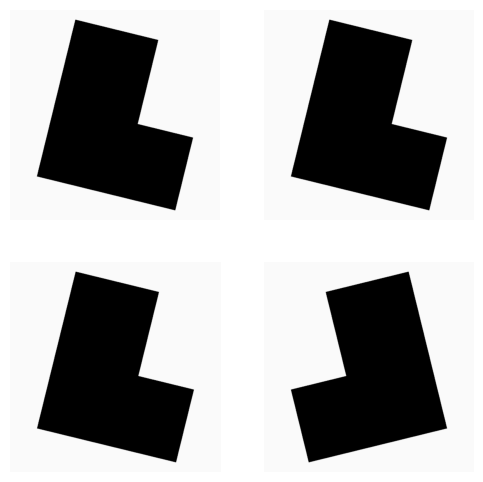

In [58]:
plt.figure(figsize=(6, 6))
for i in range(4):
  rj_i, rj_r = random_jitter(img_f, img_c)
  plt.subplot(2, 2, i + 1)
  plt.imshow(rj_i / 255.0)
  plt.axis('off')
plt.show()

In [59]:
def load_image_train(image_file):
  input_image, real_image = load(image_file)
  input_image, real_image = random_jitter(input_image, real_image)
  input_image, real_image = normalize(input_image, real_image)

  return input_image, real_image

In [60]:
def load_image_test(image_file):
  input_image, real_image = load(image_file)
  input_image, real_image = resize(input_image, real_image,
                                   IMG_HEIGHT, IMG_WIDTH)
  input_image, real_image = normalize(input_image, real_image)

  return input_image, real_image

In [61]:
train_dataset = tf.data.Dataset.list_files(str(PATH / 'train/*.png'))
train_dataset = train_dataset.map(load_image_train,
                                  num_parallel_calls=tf.data.AUTOTUNE)
train_dataset = train_dataset.shuffle(BUFFER_SIZE)
train_dataset = train_dataset.batch(BATCH_SIZE)

In [62]:
try:
  test_dataset = tf.data.Dataset.list_files(str(PATH / 'test/*.png'))
except tf.errors.InvalidArgumentError:
  test_dataset = tf.data.Dataset.list_files(str(PATH / 'val/*.png'))
test_dataset = test_dataset.map(load_image_test)
test_dataset = test_dataset.batch(BATCH_SIZE)

Building a generator

In [63]:
OUTPUT_CHANNELS = 3

In [64]:
def downsample(filters, size, apply_batchnorm=True):
  initializer = tf.random_normal_initializer(0., 0.02)

  result = tf.keras.Sequential()
  result.add(
      tf.keras.layers.Conv2D(filters, size, strides=2, padding='same',
                             kernel_initializer=initializer, use_bias=False))

  if apply_batchnorm:
    result.add(tf.keras.layers.BatchNormalization())

  result.add(tf.keras.layers.LeakyReLU())

  return result

In [65]:
down_model = downsample(3, 4)
down_result = down_model(tf.expand_dims(img_f, 0))
print (down_result.shape)

(1, 256, 256, 3)


In [66]:


def upsample(filters, size, apply_dropout=False):
  initializer = tf.random_normal_initializer(0., 0.02)

  result = tf.keras.Sequential()
  result.add(
    tf.keras.layers.Conv2DTranspose(filters, size, strides=2,
                                    padding='same',
                                    kernel_initializer=initializer,
                                    use_bias=False))

  result.add(tf.keras.layers.BatchNormalization())

  if apply_dropout:
      result.add(tf.keras.layers.Dropout(0.5))

  result.add(tf.keras.layers.ReLU())

  return result

In [67]:
up_model = upsample(3, 4)
up_result = up_model(down_result)
print (up_result.shape)

(1, 512, 512, 3)


In [68]:
def Generator():
  inputs = tf.keras.layers.Input(shape=[512, 512, 3])

  down_stack = [
    downsample(128, 4, apply_batchnorm=False),  # (batch_size, 128, 128, 64)
    downsample(256, 4),  # (batch_size, 64, 64, 128)
    downsample(512, 4),  # (batch_size, 32, 32, 256)
    downsample(1024, 4),  # (batch_size, 16, 16, 512)
    downsample(1024, 4),  # (batch_size, 8, 8, 512)
    downsample(1024, 4),  # (batch_size, 4, 4, 512)
    downsample(1024, 4),  # (batch_size, 2, 2, 512)
    downsample(1024, 4),  # (batch_size, 1, 1, 512)
  ]

  up_stack = [
    upsample(1024, 4, apply_dropout=True),  # (batch_size, 2, 2, 1024)
    upsample(1024, 4, apply_dropout=True),  # (batch_size, 4, 4, 1024)
    upsample(1024, 4, apply_dropout=True),  # (batch_size, 8, 8, 1024)
    upsample(1024, 4),  # (batch_size, 16, 16, 1024)
    upsample(512, 4),  # (batch_size, 32, 32, 512)
    upsample(256, 4),  # (batch_size, 64, 64, 256)
    upsample(128, 4),  # (batch_size, 128, 128, 128)
  ]

  initializer = tf.random_normal_initializer(0., 0.02)
  last = tf.keras.layers.Conv2DTranspose(OUTPUT_CHANNELS, 4,
                                         strides=2,
                                         padding='same',
                                         kernel_initializer=initializer,
                                         activation='tanh')  # (batch_size, 256, 256, 3)

  x = inputs

  # Downsampling through the model
  skips = []
  for down in down_stack:
    x = down(x)
    skips.append(x)

  skips = reversed(skips[:-1])

  # Upsampling and establishing the skip connections
  for up, skip in zip(up_stack, skips):
    x = up(x)
    x = tf.keras.layers.Concatenate()([x, skip])

  x = last(x)

  return tf.keras.Model(inputs=inputs, outputs=x)

In [69]:
"""
generator = Generator()
tf.keras.utils.plot_model(generator, show_shapes=True, dpi=64)
"""

'\ngenerator = Generator()\ntf.keras.utils.plot_model(generator, show_shapes=True, dpi=64)\n'

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


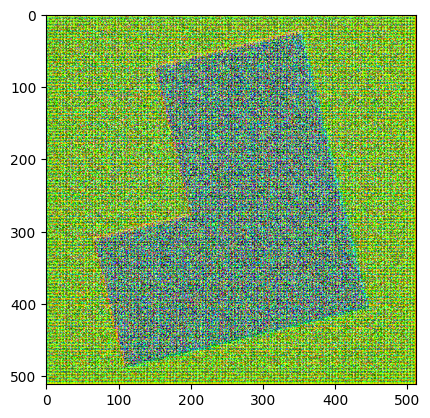

In [70]:
generator=Generator()
gen_output = generator(img_f[tf.newaxis, ...], training=False)
plt.imshow(gen_output[0, ...])

In [71]:
LAMBDA = 100

In [72]:
loss_object = tf.keras.losses.BinaryCrossentropy(from_logits=True)

In [73]:

# Define the Huber loss object
huber_loss_object = tf.keras.losses.Huber()

def generator_loss(disc_generated_output, gen_output, target):
    gan_loss = loss_object(tf.ones_like(disc_generated_output), disc_generated_output)
    
    # Huber loss
    huber_loss = huber_loss_object(target, gen_output)
    
    total_gen_loss = gan_loss + (LAMBDA * huber_loss)
    
    return total_gen_loss, gan_loss, huber_loss


Discriminator

In [74]:
def Discriminator():
  initializer = tf.random_normal_initializer(0., 0.02)

  inp = tf.keras.layers.Input(shape=[512, 512, 3], name='input_image')
  tar = tf.keras.layers.Input(shape=[512, 512, 3], name='target_image')

  x = tf.keras.layers.concatenate([inp, tar])  # (batch_size, 256, 256, channels*2)

  down1 = downsample(128, 4, False)(x)  # (batch_size, 128, 128, 64)
  down2 = downsample(256, 4)(down1)  # (batch_size, 64, 64, 128)
  down3 = downsample(512, 4)(down2)  # (batch_size, 32, 32, 256)

  zero_pad1 = tf.keras.layers.ZeroPadding2D()(down3)  # (batch_size, 34, 34, 256)
  conv = tf.keras.layers.Conv2D(1024, 4, strides=1,
                                kernel_initializer=initializer,
                                use_bias=False)(zero_pad1)  # (batch_size, 31, 31, 512)

  batchnorm1 = tf.keras.layers.BatchNormalization()(conv)

  leaky_relu = tf.keras.layers.LeakyReLU()(batchnorm1)

  zero_pad2 = tf.keras.layers.ZeroPadding2D()(leaky_relu)  # (batch_size, 33, 33, 512)

  last = tf.keras.layers.Conv2D(1, 4, strides=1,
                                kernel_initializer=initializer)(zero_pad2)  # (batch_size, 30, 30, 1)

  return tf.keras.Model(inputs=[inp, tar], outputs=last)

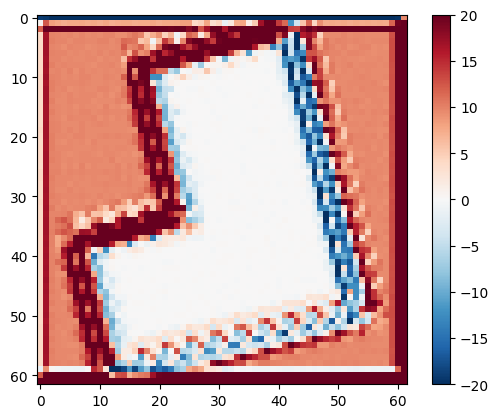

In [75]:
discriminator = Discriminator()
disc_out = discriminator([img_f[tf.newaxis, ...], gen_output], training=False)
plt.imshow(disc_out[0, ..., -1], vmin=-20, vmax=20, cmap='RdBu_r')
plt.colorbar()

In [76]:
def discriminator_loss(disc_real_output, disc_generated_output):
  real_loss = loss_object(tf.ones_like(disc_real_output), disc_real_output)

  generated_loss = loss_object(tf.zeros_like(disc_generated_output), disc_generated_output)

  total_disc_loss = real_loss + generated_loss

  return total_disc_loss

In [77]:
generator_optimizer = tf.keras.optimizers.Adam(2e-4, beta_1=0.5)
discriminator_optimizer = tf.keras.optimizers.Adam(2e-4, beta_1=0.5)

In [78]:
checkpoint_dir = './training_checkpoints'
checkpoint_prefix = os.path.join(checkpoint_dir, "ckpt")
checkpoint = tf.train.Checkpoint(generator_optimizer=generator_optimizer,
                                 discriminator_optimizer=discriminator_optimizer,
                                 generator=generator,
                                 discriminator=discriminator)

In [79]:
def generate_images(model, test_input, tar):
  prediction = model(test_input, training=True)
  plt.figure(figsize=(15, 15))

  display_list = [test_input[0], tar[0], prediction[0]]
  title = ['Input Image', 'Ground Truth', 'Predicted Image']

  for i in range(3):
    plt.subplot(1, 3, i+1)
    plt.title(title[i])
    # Getting the pixel values in the [0, 1] range to plot.
    plt.imshow(display_list[i] * 0.5 + 0.5)
    plt.axis('off')
  plt.show()
  return display_list


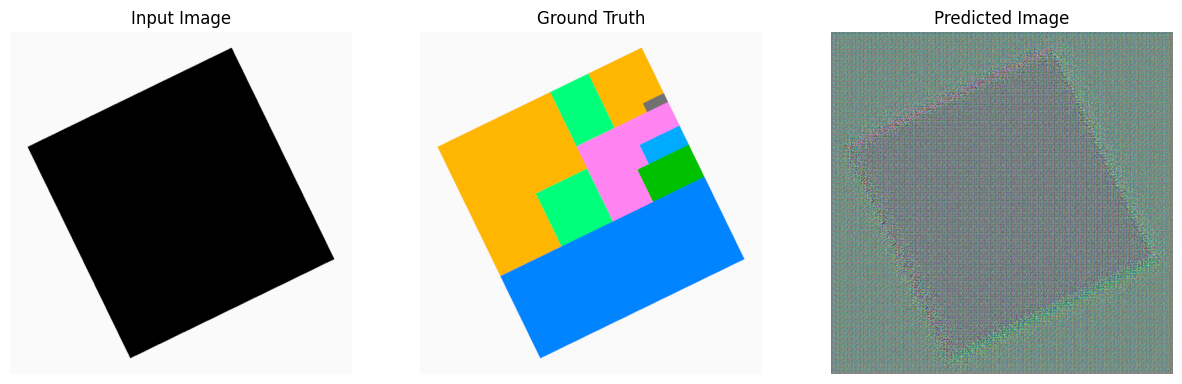

In [80]:
for example_input, example_target in test_dataset.take(1):
  generate_images(generator, example_input, example_target)

In [81]:
log_dir="logs/"

summary_writer = tf.summary.create_file_writer(
  log_dir + "fit/" + datetime.datetime.now().strftime("%Y%m%d-%H%M%S"))

In [82]:
@tf.function
def train_step(input_image, target, step):
  with tf.GradientTape() as gen_tape, tf.GradientTape() as disc_tape:
    gen_output = generator(input_image, training=True)

    disc_real_output = discriminator([input_image, target], training=True)
    disc_generated_output = discriminator([input_image, gen_output], training=True)

    gen_total_loss, gen_gan_loss, gen_l1_loss = generator_loss(disc_generated_output, gen_output, target)
    disc_loss = discriminator_loss(disc_real_output, disc_generated_output)

  generator_gradients = gen_tape.gradient(gen_total_loss,
                                          generator.trainable_variables)
  discriminator_gradients = disc_tape.gradient(disc_loss,
                                               discriminator.trainable_variables)

  generator_optimizer.apply_gradients(zip(generator_gradients,
                                          generator.trainable_variables))
  discriminator_optimizer.apply_gradients(zip(discriminator_gradients,
                                              discriminator.trainable_variables))

  with summary_writer.as_default():
    tf.summary.scalar('gen_total_loss', gen_total_loss, step=step//1000)
    tf.summary.scalar('gen_gan_loss', gen_gan_loss, step=step//1000)
    tf.summary.scalar('gen_l1_loss', gen_l1_loss, step=step//1000)
    tf.summary.scalar('disc_loss', disc_loss, step=step//1000)

In [1]:
!pip install scikit-image

  Using cached scikit_image-0.19.3-cp37-cp37m-win_amd64.whl.metadata (8.0 kB)
  Using cached networkx-2.6.3-py3-none-any.whl.metadata (5.0 kB)
  Using cached imageio-2.31.2-py3-none-any.whl.metadata (4.7 kB)
  Using cached tifffile-2021.11.2-py3-none-any.whl.metadata (29 kB)
  Using cached PyWavelets-1.3.0-cp37-cp37m-win_amd64.whl.metadata (1.9 kB)
Using cached scikit_image-0.19.3-cp37-cp37m-win_amd64.whl (12.1 MB)
Using cached imageio-2.31.2-py3-none-any.whl (313 kB)
Using cached networkx-2.6.3-py3-none-any.whl (1.9 MB)
Using cached PyWavelets-1.3.0-cp37-cp37m-win_amd64.whl (4.2 MB)
Using cached tifffile-2021.11.2-py3-none-any.whl (178 kB)


In [83]:
import numpy as np
import tensorflow as tf
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from scipy.stats import pearsonr
import os
import csv
import time
from IPython import display

def mae(y_true, y_pred):
    return mean_absolute_error(y_true, y_pred)

def mse(y_true, y_pred):
    return mean_squared_error(y_true, y_pred)

def rmse(y_true, y_pred):
    return np.sqrt(mean_squared_error(y_true, y_pred))

def r2(y_true, y_pred):
    return r2_score(y_true, y_pred)

def smape(y_true, y_pred):
    return 100/len(y_true) * np.sum(2 * np.abs(y_pred - y_true) / (np.abs(y_true) + np.abs(y_pred)))

def mape(y_true, y_pred):
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

def mase(y_true, y_pred):
    naive_forecast = np.roll(y_true, 1)
    naive_forecast[0] = y_true[0]
    return np.mean(np.abs(y_true - y_pred)) / np.mean(np.abs(y_true - naive_forecast))

def kappa(y_true, y_pred):
    return pearsonr(y_true, y_pred)[0]

def psnr(y_true, y_pred):
    mse_value = np.mean((y_true - y_pred) ** 2)
    return 20 * np.log10(1.0 / np.sqrt(mse_value))

def spectral_convergence(y_true, y_pred):
    return np.linalg.norm(y_pred - y_true) / np.linalg.norm(y_true)

def median_difference(y_true, y_pred):
    return np.median(np.abs(y_true - y_pred))

def log_mse(y_true, y_pred):
    return np.mean((np.log1p(y_true) - np.log1p(y_pred)) ** 2)


In [84]:
def calculate_metrics(y_true, y_pred):
    metrics = {
        'MAE': mae(y_true, y_pred),
        'MSE': mse(y_true, y_pred),
        'RMSE': rmse(y_true, y_pred),
        'R2': r2(y_true, y_pred),
        'SMAPE': smape(y_true, y_pred),
        'MAPE': mape(y_true, y_pred),
        'MASE': mase(y_true, y_pred),
        'Kappa': kappa(y_true, y_pred),
        'PSNR': psnr(y_true, y_pred),
        'SC': spectral_convergence(y_true, y_pred),
        'MD': median_difference(y_true, y_pred),
        'LMSE': log_mse(y_true, y_pred)
    }
    return metrics

def log_metrics_to_csv(metrics, step, filename="metrics_log.csv"):
    file_exists = os.path.isfile(filename)
    with open(filename, mode='a', newline='') as file:
        writer = csv.DictWriter(file, fieldnames=['Step'] + list(metrics.keys()))
        if not file_exists:
            writer.writeheader()
        metrics['Step'] = step
        writer.writerow(metrics)


In [85]:
def save_generated_images(display_list, step):
    plt.figure(figsize=(15, 15))

    title = ['Input Image', 'Ground Truth', 'Predicted Image']

    for i in range(len(display_list)):
        plt.subplot(1, 3, i + 1)
        plt.title(title[i])
        plt.imshow(display_list[i] * 0.5 + 0.5)  # Normalize back to [0, 1]
        plt.axis('off')
    
    plt.savefig(f'generated_image_at_step_{step}.png')
    plt.close()

In [86]:
def fit(train_ds, test_ds, steps):
    example_input, example_target = next(iter(test_ds.take(1)))
    start = time.time()

    for step, (input_image, target) in train_ds.repeat().take(steps).enumerate():
        if (step) % 1000 == 0:
            display.clear_output(wait=True)

            if step != 0:
                print(f'Time taken for 1000 steps: {time.time()-start:.2f} sec\n')

            start = time.time()
            display_list = generate_images(generator, example_input, example_target)
            save_generated_images(display_list, step)
            print(f"Step: {step//1000}k")

        train_step(input_image, target, step)

        # Training step
        if (step+1) % 10 == 0:
            print('.', end='', flush=True)

        # Calculate and log metrics every 1000 steps
        if (step + 1) % 1000 == 0:
            y_true = []
            y_pred = []
            for input_image, target in test_ds:
                prediction = generator(input_image, training=False)
                y_true.append(target.numpy().flatten())
                y_pred.append(prediction.numpy().flatten())
            
            y_true = np.concatenate(y_true, axis=0)
            y_pred = np.concatenate(y_pred, axis=0)
            
            metrics = calculate_metrics(y_true, y_pred)
            log_metrics_to_csv(metrics, step + 1)

            print(f"Metrics at step {step + 1}: {metrics}")

        # Save (checkpoint) the model every 5k steps
        if (step + 1) % 5000 == 0:
            checkpoint.save(file_prefix=checkpoint_prefix)


In [87]:
"""
%load_ext tensorboard
%tensorboard --logdir {log_dir}
"""

'\n%load_ext tensorboard\n%tensorboard --logdir {log_dir}\n'

In [88]:
device_name = tf.test.gpu_device_name()

if "GPU" not in device_name:
    print("GPU device not found")
    
print('Found GPU at: {}'.format(device_name))

print("GPU", "available (YESS!!!!)" if tf.config.list_physical_devices("GPU") else "not available :(")

Found GPU at: /device:GPU:0
GPU available (YESS!!!!)


Time taken for 1000 steps: 138.02 sec



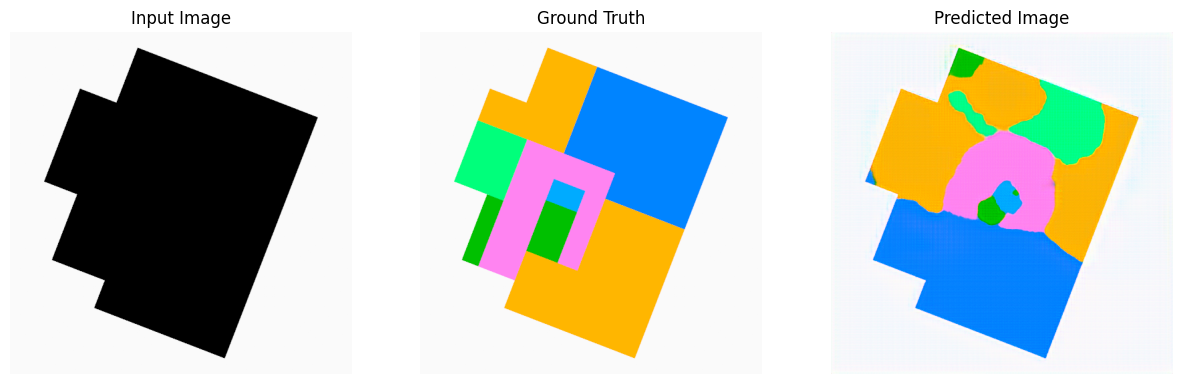

Step: 9k
....................................................................................................

c:\Users\ayush-s\research floor\SmartPlanAI-main\tenv\lib\site-packages\ipykernel_launcher.py:47: RuntimeWarning: divide by zero encountered in log1p
c:\Users\ayush-s\research floor\SmartPlanAI-main\tenv\lib\site-packages\ipykernel_launcher.py:47: RuntimeWarning: invalid value encountered in subtract


Metrics at step 10000: {'MAE': 0.35121784, 'MSE': 0.5678405, 'RMSE': 0.75355196, 'R2': -0.0968831149843683, 'SMAPE': 50.98128188503245, 'MAPE': 135.1786971092224, 'MASE': 0.56647605, 'Kappa': 0.4496542716533953, 'PSNR': 2.4577359244640573, 'SC': 0.8410803, 'MD': 0.019211948, 'LMSE': nan, 'Step': <tf.Tensor: shape=(), dtype=int64, numpy=10000>}


In [90]:
fit(train_dataset, test_dataset, steps=10000)

In [66]:
generator.summary()
discriminator.summary()
generator.save('work/genhuber')
generator.save('work/Genhuber.h5')
discriminator.save('work/dischuber')
discriminator.save('work/dischuber.h5')


Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 512, 512, 3  0           []                               
                                )]                                                                
                                                                                                  
 sequential_2 (Sequential)      (None, 256, 256, 12  6144        ['input_1[0][0]']                
                                8)                                                                
                                                                                                  
 sequential_3 (Sequential)      (None, 128, 128, 25  525312      ['sequential_2[0][0]']           
                                6)                                                            

INFO:tensorflow:Assets written to: work/genhuber\assets


INFO:tensorflow:Assets written to: work/genhuber\assets


INFO:tensorflow:Assets written to: work/dischuber\assets


INFO:tensorflow:Assets written to: work/dischuber\assets
